In [1]:
%load_ext autoreload
%autoreload 2


In [80]:
import torch
import hydra
from hydra import initialize, compose
from omegaconf import DictConfig
from hydra.core.global_hydra import GlobalHydra


In [3]:
# Clear the existing Hydra instance
GlobalHydra.instance().clear()

# Initialize Hydra in your notebook
initialize(config_path="./config", job_name="notebook")

# Compose a configuration object
cfg = compose(config_name="defaults")

/var/folders/fv/1w0p1vtd3fl9669d2s5xjvvh0000gn/T/ipykernel_15062/2898942645.py:5: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="./config", job_name="notebook")


In [5]:
# build model to be trained
task = hydra.utils.instantiate(cfg.tasks, cfg)


/opt/homebrew/anaconda3/envs/face_detection/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# build data for model to be trained on
data_module = hydra.utils.instantiate(
    cfg.data_module,
    cfg.dataset,
    cfg.transform,
    _recursive_=False,
)

In [7]:
train_dl = data_module.train_dataloader()

In [9]:
sample = next(iter(train_dl))

In [12]:
print(sample[0].size())

torch.Size([128, 3, 112, 112])


In [30]:
live_img = torch.load("/Users/matthewchoi/Projects/FaceDetection/live.pt")[0]
stored_img = torch.load("/Users/matthewchoi/Projects/FaceDetection/stored.pt").numpy()

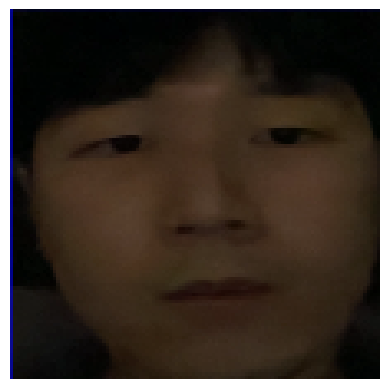

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Display the image
img = np.transpose(live_img, (1, 2, 0))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels for better visualization
plt.show()